In [178]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dataPreparation(path):
    ''' Prepares the data '''
    
    data = pandas.read_csv(path, header=None)
    print (data.head(),len(data))
    data = data[[1,2,3,4,5,6,7,8,9]]
    print (data.head())
    srcData = data.values.tolist()
    return srcData

In [3]:
path = 'data/bc.txt'
data = dataPreparation(path)

        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2 699
   1  2  3  4  5   6  7  8  9
0  5  1  1  1  2   1  3  1  1
1  5  4  4  5  7  10  3  2  1
2  3  1  1  1  2   2  3  1  1
3  6  8  8  1  3   4  3  7  1
4  4  1  1  3  2   1  3  1  1


In [207]:
class KMeans:
    ''' Main KMeans class '''
    
    def __init__(self, K):
        ''' clusters : K x 9, numpy array of K clusters
            allocation : Dictionary of K keys
        '''
        self.K = K
        self.clusters = np.zeros(self.K)
        #self.newClusters = np.zeros(self.K)
        self.allocation = {}
        self.newAllocation = {}
        
    def initCentroidSelection(self, data):
        ''' Selects the initial K centroids 
            Any K datapoints is assumed to be the two initial clusters
        '''
        
        n_data = data.shape[0]
        initClusterIdx = np.random.choice(n_data, self.K)
        #print (initClusterIdx)
        self.clusters = data[initClusterIdx]
        #print ("Cluster:",self.clusters)
        
    def calcDistance(self, X, Y):
        ''' Calculates the Eucleidian distance between two numpy arrays   
        '''
        distance = np.sqrt(np.sum((X-Y)**2,axis=1))
        #print (distance.shape)
        return distance
    
    def dataAllocationToClusters(self, data):
        ''' Allocates the datapoints to the respective clusters based on the Euclidean distance
        '''
        
        #copy new allocation to old allocation first
        if self.newAllocation:
            for clusterNum in range(self.K):
                #print ("ff:",clusterNum)
                self.allocation[clusterNum] = self.newAllocation[clusterNum]
        #input("allco")
        allDistFromEachCluster = []
        #print (data.shape,self.clusters.shape)
        for eachCluster in self.clusters:
            distFromEachCluster = self.calcDistance(data, eachCluster)
            #print (distFromEachCluster.shape, distFromEachCluster[0])
            allDistFromEachCluster.append(distFromEachCluster)
            #print (len(allDistFromEachCluster))
            #input()
        
        allDistFromEachCluster = np.array(allDistFromEachCluster)
        allocations = np.argmin(allDistFromEachCluster,axis=0)
        
        for i in range(self.K):
            dataIdxAllocated = np.where(allocations==i)
            #assert (dataIdxAllocated) != 0 
            ''' Keeps the index of data allocated to each cluster '''
            self.newAllocation[i] = dataIdxAllocated[0]

    def newClusterCreation(self, data):
        ''' Creates new K clusters based on previous allocations
            This is done by calculating mean of each allocated data points to each clusters
        '''
        newClusterList = []
        for eachCluster in range(self.K):
            dataPoints = data[self.newAllocation[eachCluster]]
            assert len(dataPoints) != 0
            newClusterList.append(np.mean(dataPoints,axis=0))
        self.clusters = np.array(newClusterList)
        
    def calcError(self):
        ''' Calculate errors between final clusters and datapoints
        '''
        totalDistance = 0
        for l in range(self.K):
            dataPoints = data[self.newAllocation[l]]
            dist = self.calcDistance(dataPoints,self.clusters[l])
            totalDistance += sum(dist)
            
        print("totalDistance:",totalDistance)
        return totalDistance
        
    def checkStopingCondition(self):
        ''' Checks if old and new allocations are same or different
        '''
        if (not self.allocation) or (not self.newAllocation):
            return False
        for l in range(self.K):
            if (set(list(self.allocation[l])) != set(list(self.newAllocation[l]))):
                return False
        return True
    
def visualization(loss):
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    KList = loss.keys()
    L = loss.values()
    print (KList, L)
    ax.plot(KList, L, label='Loss vs value',marker='o')
    #plt.xlim(0,110)
    #plt.ylim(0,0.2)
    plt.title("KMeans-Loss vs K")
    plt.legend()
    plt.xlabel("K")
    plt.ylabel("Loss")
    #fig.savefig("AccuracyVsK.png")
    plt.show()

totalDistance: 3056.9660203490866
totalDistance: 2850.449172634807
totalDistance: 2645.581278722949
totalDistance: 2527.0509225415626
totalDistance: 2432.214226738704
totalDistance: 2404.7467841238536
totalDistance: 2319.1247093360503
totalDistance: 2303.8668605381936
totalDistance: 2241.003717896833
totalDistance: 2201.4720648758885
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]) dict_values([3056.9660203490866, 2850.449172634807, 2645.581278722949, 2527.0509225415626, 2432.214226738704, 2404.7467841238536, 2319.1247093360503, 2303.8668605381936, 2241.003717896833, 2201.4720648758885])


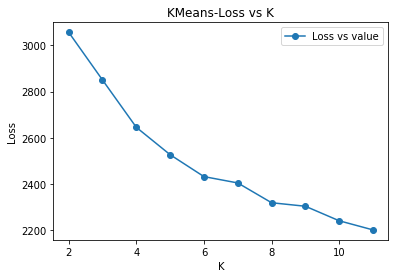

In [221]:
allK = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
loss = {}
for K in allK:
    kmeans = KMeans(K)
    data = np.array(data)
    n_data = data.shape[0]
    kmeans.initCentroidSelection(data)
    kmeans.dataAllocationToClusters(data)
    isDone = kmeans.checkStopingCondition()

    count = 0
    while(not isDone):
        count += 1
        kmeans.newClusterCreation(data)
        kmeans.dataAllocationToClusters(data)
        isDone = kmeans.checkStopingCondition()
    L = kmeans.calcError()
    loss[K] = L
    
visualization(loss)
    